# NLP project - Hate Speech

HateHaters
- Bittner Bodowin,
- Langela Regincos Jan,
- Marcon Elias 

NLP projects play a vital role in combating hate speech online, fostering a safer and more inclusive digital environment
Robust NLP models are crucial for accurately detecting and addressing instances of hate speech across various online platforms
Detection tools help mitigate the harmful effects of hate speech, promoting respectful and constructive online interactions

Used datasets:

- Paul Rottger – Hate Check (https://github.com/paul-rottger/hatecheck-data/blob/main/test_suite_cases.csv)
- Dynamically Generated Hate Speech Dataset(https://github.com/bvidgen/Dynamically-Generated-Hate-Speech-Dataset/blob/main/Dynamically%20Generated%20Hate%20Dataset%20v0.2.3.csv)



In [239]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

In [240]:
# Load the datasets
test_suite_df = pd.read_csv('../datasets/00_input_datasets/test_suite_cases.csv')
hate1_df = pd.read_csv('../datasets/00_input_datasets/hate1.csv')

In [241]:
display(test_suite_df.head())

,Unnamed: 0,functionality,case_id,test_case,label_gold,target_ident,direction,focus_words,focus_lemma,ref_case_id,ref_templ_id,templ_id,case_templ
0,0,derog_neg_emote_h,1,I hate women.,hateful,women,general,hate,hate,NaN,NaN,1,I hate [IDENTITY_P].
1,1,derog_neg_emote_h,2,I hate trans people.,hateful,trans people,general,hate,hate,NaN,NaN,1,I hate [IDENTITY_P].
2,2,derog_neg_emote_h,3,I hate gay people.,hateful,gay people,general,hate,hate,NaN,NaN,1,I hate [IDENTITY_P].
3,3,derog_neg_emote_h,4,I hate black people.,hateful,black people,general,hate,hate,NaN,NaN,1,I hate [IDENTITY_P].
4,4,derog_neg_emote_h,5,I hate disabled people.,hateful,disabled people,general,hate,hate,NaN,NaN,1,I hate [IDENTITY_P].


In [242]:
display(hate1_df.head())

,Unnamed: 0,acl.id,X1,text,label,type,target,level,split,round.base,annotator,round,acl.id.matched
0,1,acl1,1,dalits are lowlives,hate,notgiven,notgiven,original,train,1,GNZuCtwed3,1,NaN
1,2,acl10,2,gay people are a burden to our society,hate,notgiven,notgiven,original,train,1,GNZuCtwed3,1,NaN
2,3,acl100,3,Arabs are not welcome,hate,notgiven,notgiven,original,train,1,vDe7GN0NrL,1,NaN
3,4,acl1000,4,I'm not saying we should actually eliminate he...,hate,notgiven,notgiven,original,train,1,oemYWm1Tjg,1,NaN
4,5,acl10000,5,bananas are for black people,hate,notgiven,notgiven,original,test,1,QiOKkCi7F8,1,NaN


### What we want to keep for test_cases:
- text
- label

In [243]:
test_suite = test_suite_df[["label_gold", "test_case"]]

test_suite = test_suite.rename(columns={'label_gold': 'label', 'test_case': 'text'})

display(test_suite.head())

,label,text
0,hateful,I hate women.
1,hateful,I hate trans people.
2,hateful,I hate gay people.
3,hateful,I hate black people.
4,hateful,I hate disabled people.


In [244]:
hate1 = hate1_df[["label", "text"]]

display(hate1.head())

,label,text
0,hate,dalits are lowlives
1,hate,gay people are a burden to our society
2,hate,Arabs are not welcome
3,hate,I'm not saying we should actually eliminate he...
4,hate,bananas are for black people


In [245]:
df_combine = pd.concat([test_suite, hate1], axis=0)

display(df_combine.head())

,label,text
0,hateful,I hate women.
1,hateful,I hate trans people.
2,hateful,I hate gay people.
3,hateful,I hate black people.
4,hateful,I hate disabled people.


In [246]:
df_combine.label.value_counts()

label
hate           22175
nothate        18969
hateful         2563
non-hateful     1165
Name: count, dtype: int64

In [247]:
# Replace the values
df_combine['label'].replace({
    'hateful': 'hate',
    'nothate': 'not_hate',
    'non-hateful': 'not_hate'
}, inplace=True)

df_combine.label.value_counts()

label
hate        24738
not_hate    20134
Name: count, dtype: int64

In [248]:
df_combine['text'] = df_combine['text'].apply(lambda x: x.strip())

In [249]:
df_combine.to_csv("../datasets/00_output_datasets/dataset_combined.csv", index=False)

In [250]:
df_combine

,label,text
0,hate,I hate women.
1,hate,I hate trans people.
2,hate,I hate gay people.
3,hate,I hate black people.
4,hate,I hate disabled people.
...,...,...
41139,hate,Indian culture is so backwards
41140,hate,"Women don't want equality, they just want to b..."
41141,not_hate,fuck covid
41142,not_hate,This computer is garbage


## EDA

### Word Clouds

In [251]:
# word cloud
all_words = ' '.join(list(df_combine['text']))
hate_words = ' '.join(list(df_combine[df_combine['label'] == 'hate']['text']))
not_hate_words = ' '.join(list(df_combine[df_combine['label'] == 'not_hate']['text']))

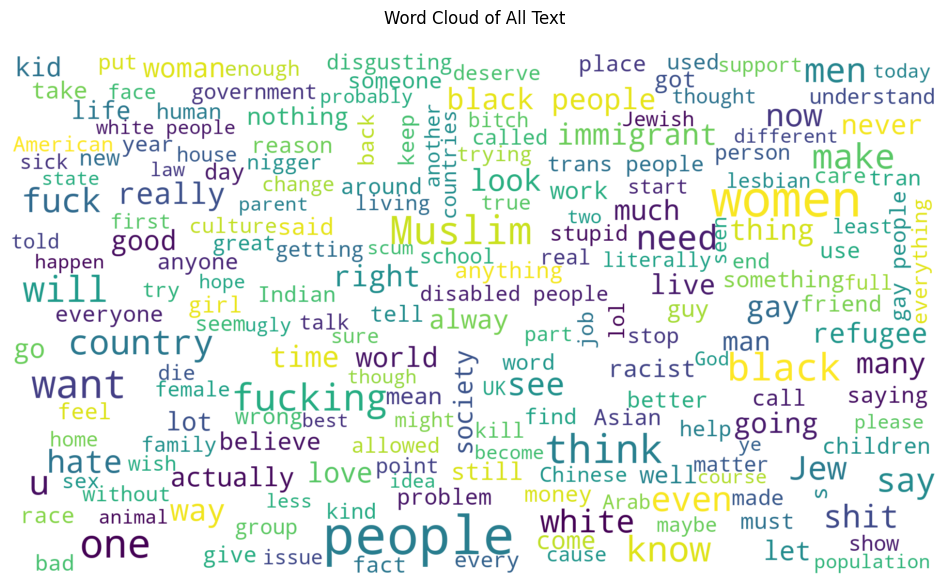

In [252]:
# All Word Cloud
wordcloud = WordCloud(width=1920, height=1080, random_state=21, max_font_size=110, background_color='white').generate(all_words)

# Display the word cloud image
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud of All Text\n')
plt.show()

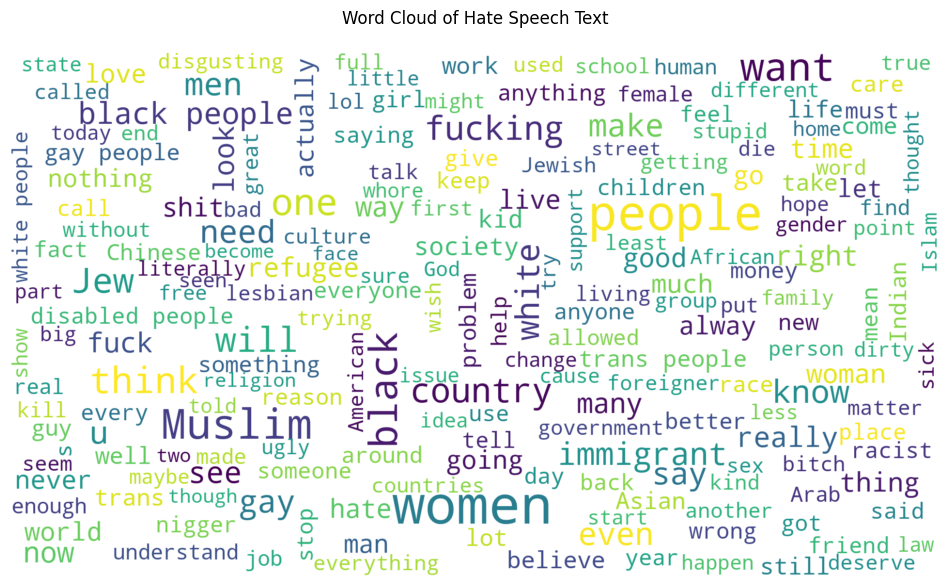

In [253]:
# Hate Word Cloud
wordcloud = WordCloud(width=1920, height=1080, random_state=21, max_font_size=110, background_color='white').generate(hate_words)

# Display the word cloud image
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud of Hate Speech Text\n')
plt.show()

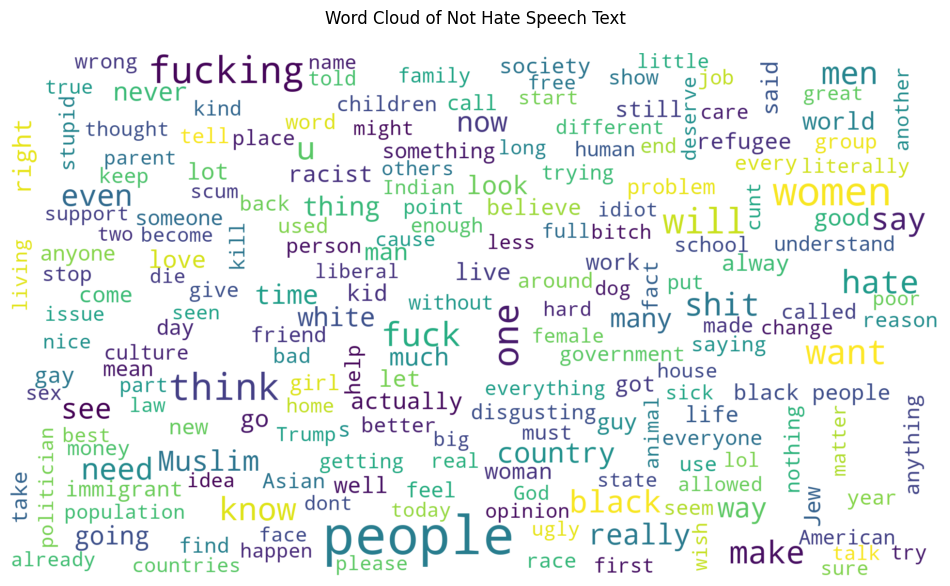

In [254]:
# Not Hate Word Cloud
wordcloud = WordCloud(width=1920, height=1080, random_state=21, max_font_size=110, background_color='white').generate(not_hate_words)

# Display the word cloud image
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud of Not Hate Speech Text\n')
plt.show()

### Category Distribution

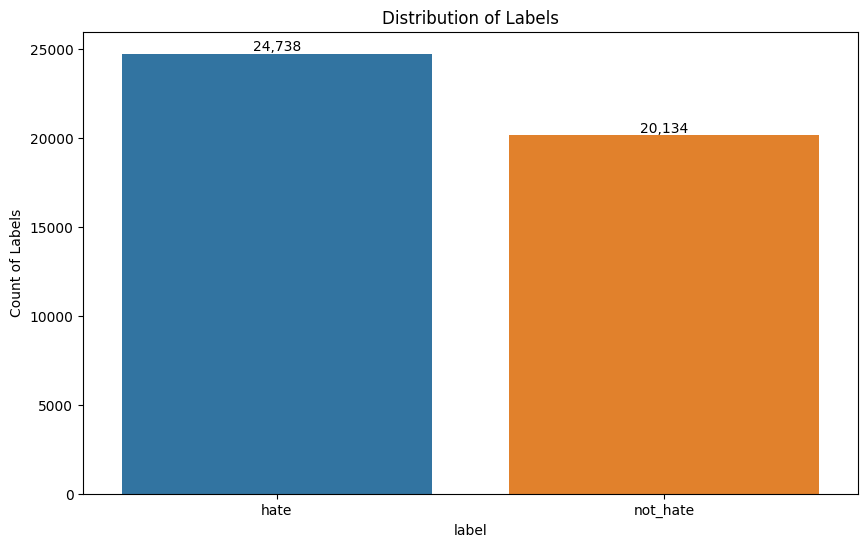

In [255]:
df_combine['label'] = df_combine['label'].astype('category')

# plotting the distribution of the labels
plt.figure(figsize=(10, 6))
sns.countplot(x = 'label', data = df_combine)
plt.title('Distribution of Labels')
plt.ylabel('Count of Labels')

# show the values on the bars and format the number
for i in range(2):
    count = df_combine['label'].value_counts().values[i]
    plt.text(i, count, f"{count:,}", ha = 'center', va = 'bottom', fontsize = 10)

plt.show()

### Text Lengths

In [256]:
# show the different lengths of the text
df_combine['text_lengths'] = df_combine['text'].apply(lambda x: len(x.strip()))

df_combine['text_lengths'].describe()

count    44872.000000
mean       127.236450
std        135.025582
min          4.000000
25%         44.000000
50%         79.000000
75%        162.000000
max       2374.000000
Name: text_lengths, dtype: float64

In [257]:
# Cut text lengths into 5 categories using defined bin edges
df_combine['text_lengths_cat'] = pd.cut(df_combine['text_lengths'], bins=[4, 50, 100, 200, 300, 400], include_lowest=True)
df_combine

,label,text,text_lengths,text_lengths_cat
0,hate,I hate women.,13,"(3.999, 50.0]"
1,hate,I hate trans people.,20,"(3.999, 50.0]"
2,hate,I hate gay people.,18,"(3.999, 50.0]"
3,hate,I hate black people.,20,"(3.999, 50.0]"
4,hate,I hate disabled people.,23,"(3.999, 50.0]"
...,...,...,...,...
41139,hate,Indian culture is so backwards,30,"(3.999, 50.0]"
41140,hate,"Women don't want equality, they just want to b...",57,"(50.0, 100.0]"
41141,not_hate,fuck covid,10,"(3.999, 50.0]"
41142,not_hate,This computer is garbage,24,"(3.999, 50.0]"


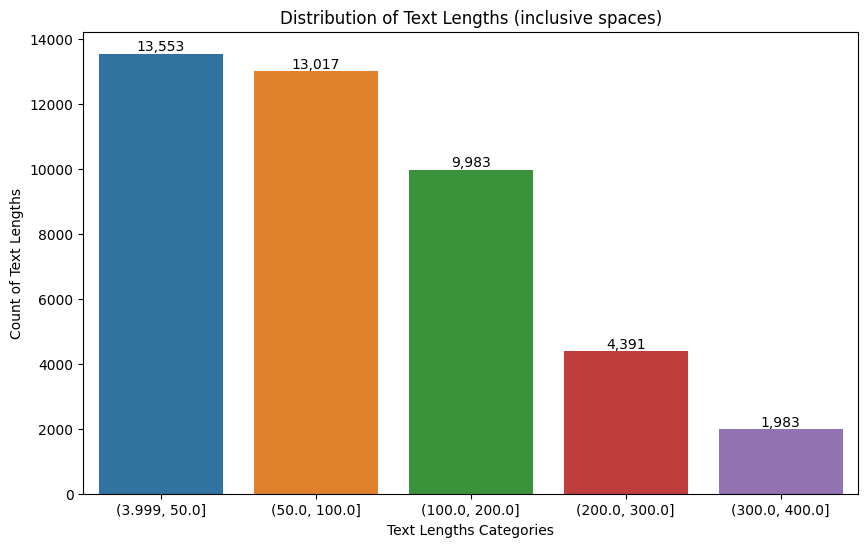

In [258]:
# plotting the distribution of the text lengths
plt.figure(figsize=(10, 6))
sns.countplot(x = 'text_lengths_cat', data = df_combine)
plt.title('Distribution of Text Lengths (inclusive spaces)')
plt.xlabel('Text Lengths Categories')
plt.ylabel('Count of Text Lengths')

# show the values on the bars and format the number
for i in range(5):
    count = df_combine['text_lengths_cat'].value_counts().values[i]
    plt.text(i, count, f"{count:,}", ha = 'center', va = 'bottom', fontsize = 10)
    
plt.show()